## Projeto Final

### Estudo de caso:  Short-term fasting effect on skeletal muscle: time course

Descrição do dataset:
Análise de biópsias musculares esqueléticas recolhidas em 1,5; 4; 10 e 24 horas após a refeição em homens jovens e saudáveis submetidos a um jejum de 24 horas. Os resultados fornecem uma compreensão sobre os mecanismos moleculares subjacentes à adaptação metabólica ao jejum em seres humanos saudáveis, tendo como objetivo, neste trabalho,estabelecer uma relação entre a expressão genética e o tempo de jejum.
O dataset apresenta uma coleção de genes, cerca de 48107 de 48 amostras. Cada amostra é caracterizada nos metadados com base em 4 variáveis: amostra (sample), individuo (individual), tempo (time) e descrição (description).  

Ficheros usados :
- *gds5473.csv* - file with gene expression data ( Gene-> ILMN...)
- *meta-gds5473.csv* - clinical variables for each sample (GSM..) 


In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn import *
from sklearn.decomposition import PCA

%matplotlib inline
import matplotlib.pyplot as plt

## Etapa 1

### Leitura dos dados e dos metadados


In [2]:
# Opening the dataset with pandas
data = pd.read_csv("gds5473.csv", sep=',', index_col = 0)
# Opening the metadata
meta = pd.read_csv("meta-gds5473.csv", sep = ",", index_col = 0)


In [3]:
data.head()

,GSM1348553,GSM1348554,GSM1348555,GSM1348556,GSM1348557,GSM1348558,GSM1348559,GSM1348560,GSM1348561,GSM1348562,...,GSM1348591,GSM1348592,GSM1348593,GSM1348594,GSM1348595,GSM1348596,GSM1348597,GSM1348598,GSM1348599,GSM1348600
ILMN_1343048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ILMN_1343049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ILMN_1343050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ILMN_1343052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ILMN_1343059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
meta.head()

,sample,individual,time,description
GSM1348553,GSM1348553,subject 1,hour 1.5,"Value for GSM1348553: Subject 1 - 1,5h post-me..."
GSM1348554,GSM1348554,subject 1,hour 4,Value for GSM1348554: Subject 1 - 4h post-meal...
GSM1348555,GSM1348555,subject 1,hour 10,Value for GSM1348555: Subject 1 - 10h post-mea...
GSM1348556,GSM1348556,subject 1,hour 24,Value for GSM1348556: Subject 1 - 24h post-mea...
GSM1348557,GSM1348557,subject 2,hour 1.5,"Value for GSM1348557: Subject 2 - 1,5h post-me..."


In [5]:
print(data.values.shape)
print(meta.values.shape)

(48107, 48)
(48, 4)


Existem 48107 genes de 48 amostras diferentes no dataset. No meta-dataset estão presentes 48 amostras e 4 colunas com os atributos sample, individual, time e description. No caso do data, como irá ser feita uma aplicacao de machine learning e os objetos de estudo serão os genes, é necessários estes se encontrarem nas colunas. Consequentemente, realizou-se a transposta no dataset.

In [6]:
data_all = data.transpose()
data_all.head()

,ILMN_1343048,ILMN_1343049,ILMN_1343050,ILMN_1343052,ILMN_1343059,ILMN_1343061,ILMN_1343062,ILMN_1343063,ILMN_1343064,ILMN_1343291,...,ILMN_3311145,ILMN_3311150,ILMN_3311155,ILMN_3311160,ILMN_3311165,ILMN_3311170,ILMN_3311175,ILMN_3311180,ILMN_3311185,ILMN_3311190
GSM1348553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.9,...,7.3,7.3,7.2,7.3,7.6,7.0,7.3,7.3,7.2,7.3
GSM1348554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.6,...,7.1,7.1,7.3,7.2,7.5,7.3,7.2,7.5,7.3,7.2
GSM1348555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.1,...,7.2,7.5,7.4,7.1,7.5,7.2,7.2,7.4,7.2,7.4
GSM1348556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7,...,7.2,7.4,7.2,7.2,7.4,7.1,7.3,7.5,7.4,7.3
GSM1348557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.1,...,7.1,7.3,7.2,7.4,7.6,7.3,7.1,7.4,7.3,7.3


### Exploração dos dados

In [7]:
data_all.describe() ## transposto - por genes

,ILMN_1343048,ILMN_1343049,ILMN_1343050,ILMN_1343052,ILMN_1343059,ILMN_1343061,ILMN_1343062,ILMN_1343063,ILMN_1343064,ILMN_1343291,...,ILMN_3311145,ILMN_3311150,ILMN_3311155,ILMN_3311160,ILMN_3311165,ILMN_3311170,ILMN_3311175,ILMN_3311180,ILMN_3311185,ILMN_3311190
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.000000,...,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.047917,...,7.247917,7.322917,7.293750,7.237500,7.460417,7.241667,7.225000,7.360417,7.220833,7.287500
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.245807,...,0.107168,0.127562,0.113749,0.108422,0.128394,0.104847,0.106191,0.116216,0.100970,0.098121
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.300000,...,7.000000,7.000000,7.100000,6.900000,7.200000,7.000000,7.000000,7.200000,7.000000,7.100000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.900000,...,7.200000,7.200000,7.200000,7.200000,7.400000,7.200000,7.200000,7.300000,7.200000,7.200000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.100000,...,7.250000,7.300000,7.300000,7.200000,7.500000,7.200000,7.200000,7.300000,7.200000,7.300000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.200000,...,7.300000,7.400000,7.400000,7.300000,7.500000,7.300000,7.300000,7.500000,7.300000,7.400000
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.500000,...,7.500000,7.600000,7.500000,7.500000,7.800000,7.500000,7.500000,7.600000,7.500000,7.500000


In [8]:
data.describe() ## por amostras (pacientes)

,GSM1348553,GSM1348554,GSM1348555,GSM1348556,GSM1348557,GSM1348558,GSM1348559,GSM1348560,GSM1348561,GSM1348562,...,GSM1348591,GSM1348592,GSM1348593,GSM1348594,GSM1348595,GSM1348596,GSM1348597,GSM1348598,GSM1348599,GSM1348600
count,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,...,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000
mean,7.715842,7.715842,7.715842,7.715842,7.715844,7.715842,7.715842,7.715842,7.715844,7.715842,...,7.715842,7.715842,7.715842,7.715842,7.715844,7.715844,7.715842,7.715844,7.715842,7.715842
std,1.063854,1.063854,1.063854,1.063854,1.063854,1.063854,1.063854,1.063854,1.063853,1.063854,...,1.063854,1.063854,1.063854,1.063854,1.063854,1.063853,1.063854,1.063853,1.063854,1.063854
min,6.800000,6.800000,6.800000,6.800000,6.800000,6.800000,6.800000,6.800000,6.800000,6.800000,...,6.800000,6.800000,6.800000,6.800000,6.800000,6.800000,6.800000,6.800000,6.800000,6.800000
25%,7.200000,7.200000,7.200000,7.200000,7.200000,7.200000,7.200000,7.200000,7.200000,7.200000,...,7.200000,7.200000,7.200000,7.200000,7.200000,7.200000,7.200000,7.200000,7.200000,7.200000
50%,7.400000,7.400000,7.400000,7.400000,7.400000,7.400000,7.400000,7.400000,7.400000,7.400000,...,7.400000,7.400000,7.400000,7.400000,7.400000,7.400000,7.400000,7.400000,7.400000,7.400000
75%,7.600000,7.600000,7.600000,7.600000,7.600000,7.600000,7.600000,7.600000,7.600000,7.600000,...,7.600000,7.600000,7.600000,7.600000,7.600000,7.600000,7.600000,7.600000,7.600000,7.600000
max,15.300000,15.300000,15.300000,15.300000,15.300000,15.300000,15.300000,15.300000,15.300000,15.300000,...,15.300000,15.300000,15.300000,15.300000,15.300000,15.300000,15.300000,15.300000,15.300000,15.300000


In [9]:
# tipo de atributos
meta.dtypes

sample         object
individual     object
time           object
description    object
dtype: object

In [10]:
meta.describe(include = "all")

,sample,individual,time,description
count,48,48,48,48
unique,48,12,4,48
top,GSM1348553,subject 1,hour 1.5,"Value for GSM1348553: Subject 1 - 1,5h post-me..."
freq,1,4,12,1


In [11]:
data_all.isnull().sum().sum() ## missing values no dataset

37632

In [12]:
data_all.isnull().sum()

ILMN_1343048    48
ILMN_1343049    48
ILMN_1343050    48
ILMN_1343052    48
ILMN_1343059    48
                ..
ILMN_3311170     0
ILMN_3311175     0
ILMN_3311180     0
ILMN_3311185     0
ILMN_3311190     0
Length: 48107, dtype: int64

In [13]:
meta.isnull().sum().sum() ## missing values no metadaset

0

### Tratamento de missing values

Através da análise de missing values, foi possível inferir que existem 37632 valores nulos no dataset 'gds5473.csv'.
Desta forma, considerou-se que o tratamento mais adequado seria proceder à remoção dos mesmos.


In [14]:
data_all.dropna(axis="columns", inplace=True)             
data.dropna(axis=0,inplace=True )
data_all.shape

(48, 47323)

Com o tratamento dos valores nulos, restam 47323 genes a serem analisados

### Número de indíviduos presentes no ensaio

<Axes: >

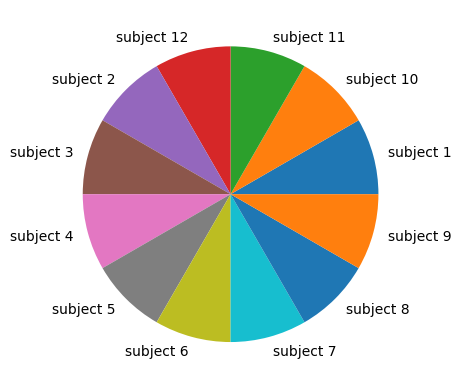

In [15]:
meta.groupby("individual").size().plot.pie()

In [16]:
meta.groupby("individual").size() 

individual
subject 1     4
subject 10    4
subject 11    4
subject 12    4
subject 2     4
subject 3     4
subject 4     4
subject 5     4
subject 6     4
subject 7     4
subject 8     4
subject 9     4
dtype: int64

É possível observar que existem 12 indíviduos presentes no estudo. Desta forma, cada indivíduo terá 4 amostras.

### Seleção de variáveis

Analisando todas as variáveis do metadataset,chegou-se à conclusão que a única relevante é o tempo de jejum até à recolha da amostra (time).
Com efeito, procedeu-se à remoção das restantes variáveis.

In [17]:
meta.drop(['sample', 'description', 'individual'], axis=1, inplace=True)
meta.head()

,time
GSM1348553,hour 1.5
GSM1348554,hour 4
GSM1348555,hour 10
GSM1348556,hour 24
GSM1348557,hour 1.5


### Exploração Gráfica

<Axes: >

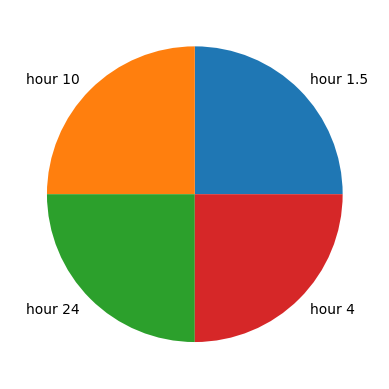

In [18]:
meta.groupby("time").size().plot.pie()

In [19]:
meta.groupby("time").size() 

time
hour 1.5    12
hour 10     12
hour 24     12
hour 4      12
dtype: int64

Através da exploração gráfica, foi possível inferir que o target está balanceado, possuindo para cada classe 12 amostras analisadas.

### Análise da variabilidade

 Variabilidade média dos níveis de expressão génica entre as amostras para todos os genes considerados.

In [20]:
input_data = data_all.values 

print(input_data.shape)

(48, 47323)


In [21]:

variances = input_data.var(axis = 0) # calculate the variance for each gene

print(variances.shape)

medvar = variances.mean()
medvar

(47323,)


0.025840169846351436

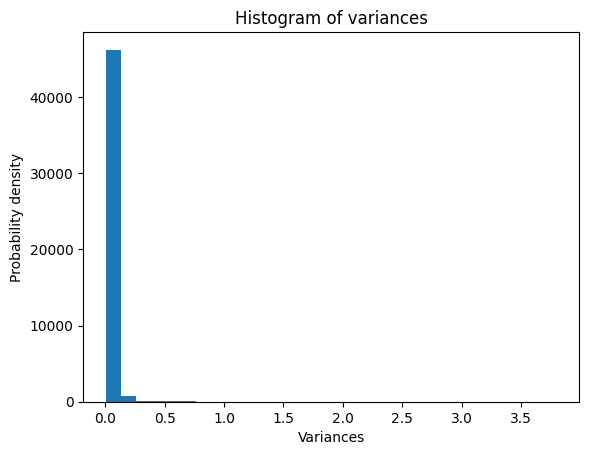

In [22]:
plt.hist(variances, bins = 30)
plt.xlabel('Variances')
plt.ylabel('Probability density')
plt.title(r'Histogram of variances')
plt.show()

A partir da análise do gráfico, os níveis de expressão de genes tendem a ser relativamente estáveis ou consistentes entre as amostras, pelo menos em termos de variabilidade.

In [23]:
# variability filters (flat patterns)
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold= medvar*3)
input_filt = sel.fit_transform(input_data)
input_filt.shape

(48, 2371)

### Expressão Diferencial de genes

Foi elaborada uma análise de seleção de características usando o método ANOVA (ou teste t) para selecionar genes diferencialmente expressos. 
 Os genes que apresentam diferenças estatisticamente significativas são os que são destacados como genes diferencialmente expressos.
 O p-value para a rejeição da hipótese nula foi de 0.01.

In [24]:
from sklearn.feature_selection import SelectPercentile, f_classif

# fclassif - ANOVA or t-test 
# We are selecting genes with the lowest p-value (10% of genes with the lowes value)
selector = SelectPercentile(f_classif, percentile=10)

output_time = meta.values[:,0] #todas as linhas e apenas primeira coluna

selector.fit_transform(data_all, output_time) # responsável pelo treino do modelo
genes_dif = np.where(selector.pvalues_ <0.01) # selecionar só as colunas com os genes diferencialmente expressos

print(data_all.columns[genes_dif])


Index(['ILMN_1651278', 'ILMN_1651285', 'ILMN_1651628', 'ILMN_1651767',
       'ILMN_1651964', 'ILMN_1652082', 'ILMN_1652085', 'ILMN_1652246',
       'ILMN_1652407', 'ILMN_1652549',
       ...
       'ILMN_3307782', 'ILMN_3307791', 'ILMN_3307892', 'ILMN_3307906',
       'ILMN_3307958', 'ILMN_3309494', 'ILMN_3310118', 'ILMN_3310226',
       'ILMN_3310835', 'ILMN_3310840'],
      dtype='object', length=2047)


## Etapa 2

#  Unsupervised machine learning

#### Pré-Processamento dos dados

In [25]:
data_scale = preprocessing.scale(input_data) #Padronização dos dados de entrada
# Média e desvio padrão dos dados padronizados
print("Average: ", data_scale.mean())        
print("Standard Deviation: ", data_scale.std())
#Variável input_dif vai conter a coluna correspondente aos genes diferenciados padronizados
input_dif = data_scale[:,genes_dif[0]]

Average:  -1.6160869582580446e-16
Standard Deviation:  1.0000000000000002


### PCA

In [26]:
# seleção nº elementos principais de forma a representar 90% da variância total dos dados 
pca = PCA(n_components=0.9) 
X_r = pca.fit(data_scale).transform(data_scale)

print('Explained Variance: %s'% str(pca.explained_variance_ratio_))
pca.explained_variance_ratio_.sum()

Explained Variance: [0.0600652  0.05692305 0.03827444 0.033794   0.02967008 0.02914113
 0.02558613 0.0249199  0.02346026 0.02336347 0.02285573 0.02241609
 0.02133673 0.02128118 0.02033127 0.02020278 0.02007006 0.01969584
 0.01927423 0.01876734 0.01852937 0.01837052 0.01816186 0.01802457
 0.01789171 0.01778614 0.01763206 0.01741641 0.01722435 0.01716251
 0.01708501 0.01682934 0.01679698 0.01667714 0.01647834 0.01629903
 0.01618404 0.01601692 0.01589857 0.01587628 0.0157441 ]


0.9095141516999561

In [27]:
X_r.shape[1]

41

41 componentes explicam 90% da variabilidade.

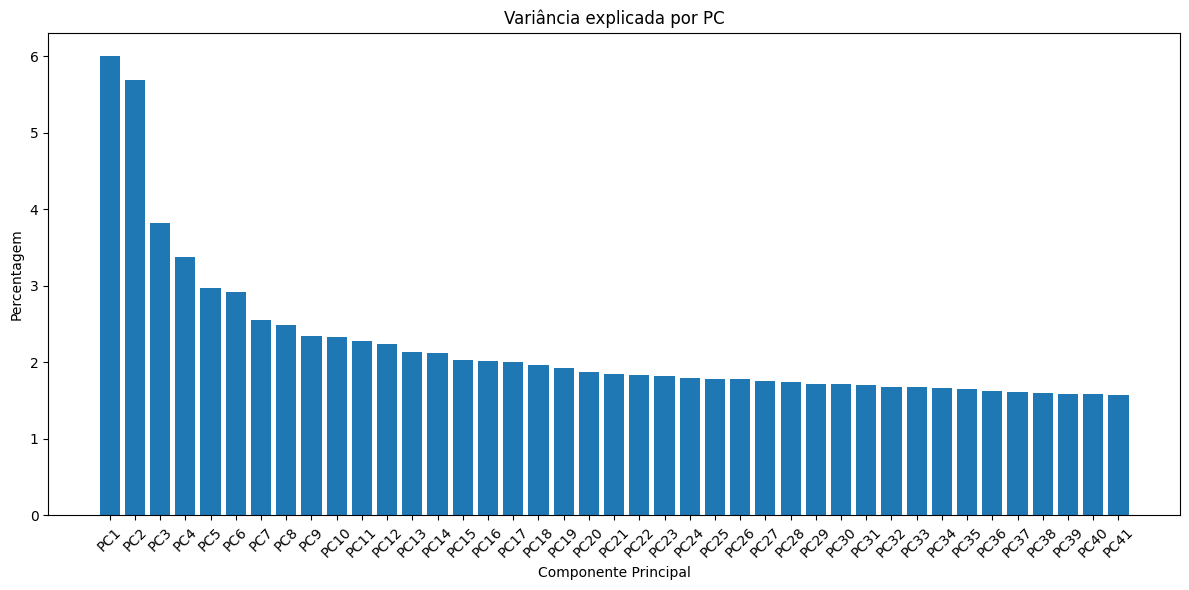

In [28]:
n = 41 # nº total de componentes principais
plt.figure(figsize=(12, 6))
plt.bar(range(n), pca.explained_variance_ratio_*100)
plt.xticks(range(n), ['PC'+str(i) for i in range(1,n+1)],rotation=45)
plt.title("Variância explicada por PC")
plt.ylabel("Percentagem")
plt.xlabel("Componente Principal")
plt.tight_layout()
plt.show() 

Através da análise, as proporções da variância total explicadas por cada um dos componentes principais obtidos após a aplicação da Análise de Componentes Principais (PCA) nos dados, não foi possível realizar a redução de dimensionalidade, visto que cada componente retém percentagens da variância total muito baixas.

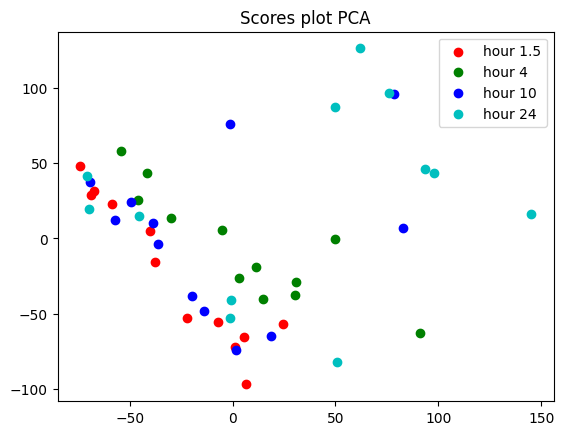

In [29]:
plt.figure()
for c, name in zip("rgbc", ['hour 1.5', 'hour 4' ,'hour 10','hour 24']):
    plt.scatter(X_r[meta['time'] == name, 0], X_r[meta['time'] == name, 1], c=c, label=name)
plt.legend()
plt.title('Scores plot PCA')
plt.show()

### Hierarchical clustering

In [30]:
from sklearn.cluster import AgglomerativeClustering
hclust = AgglomerativeClustering(n_clusters=4, metric="euclidean", linkage="complete")
hclust.fit(data_scale) #

AgglomerativeClustering(linkage='complete', metric='euclidean', n_clusters=4)

In [31]:
# Elaboração de uma tabela cruzada entre o tempo e o clustering
res_hc = hclust.labels_
pd.crosstab (meta["time"], res_hc)


col_0,0,1,2,3
time,,,,
hour 1.5,4,0,7,1
hour 10,3,3,6,0
hour 24,3,6,3,0
hour 4,6,0,6,0


Denotar que não é possível retirar conclusões da tabela anterior, uma vez que os clusters apresentam uma grande dispersividade. 

### K-means clustering

In [32]:
from sklearn.cluster import KMeans
k=4
kmeans = KMeans(n_clusters=k, max_iter = 1000, n_init = 10)
kmeans.fit(data_scale)
labels = kmeans.labels_
centroids= kmeans.cluster_centers_
pd.crosstab (labels,meta["time"],rownames=['clusters'])

time,hour 1.5,hour 10,hour 24,hour 4
clusters,,,,
0,4,3,3,0
1,7,5,3,3
2,0,3,6,0
3,1,1,0,9


Através da análise dos resultados obtidos sem filtro, mais uma vez não é possível retirar conclusões. Procedeu-se assim à aplicação do filtro da Expressão des genes diferenciais.

**Tendo em conta a Expressão de Gene Diferencial :**

In [33]:
pca = PCA(n_components=41)
X_r = pca.fit(input_dif).transform(input_dif)

print('Explained Variance: %s'% str(pca.explained_variance_ratio_))
pca.explained_variance_ratio_.sum()

Explained Variance: [0.28182264 0.14913318 0.04463469 0.03989197 0.03447119 0.02560766
 0.02444201 0.02391823 0.02091768 0.01868887 0.01735184 0.01657313
 0.01588103 0.01453841 0.01311724 0.01263246 0.01209371 0.01130122
 0.01122964 0.01070109 0.01029924 0.00997914 0.00982635 0.0094568
 0.00932388 0.00894005 0.00878706 0.0085623  0.00820831 0.00784634
 0.00782363 0.0076679  0.0074187  0.00739719 0.00721519 0.0070389
 0.00692937 0.00661103 0.00643081 0.00632982 0.00604361]


0.9670835026962648

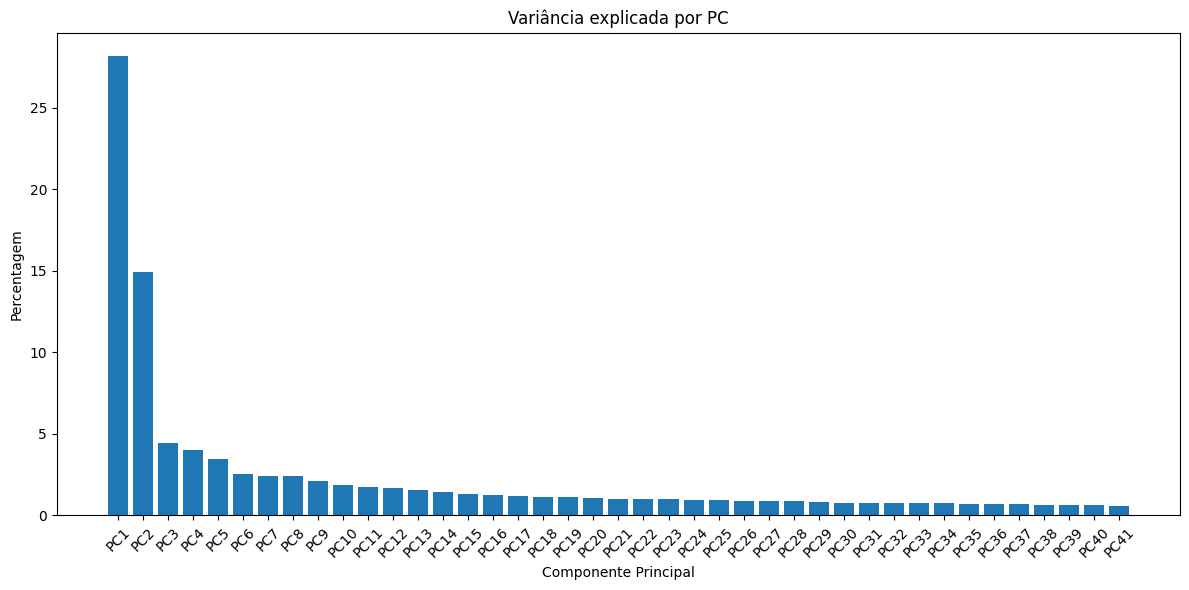

In [34]:
n = 41
plt.figure(figsize=(12, 6))
plt.bar(range(n), pca.explained_variance_ratio_*100)
plt.xticks(range(n), ['PC'+str(i) for i in range(1,n+1)],rotation=45)
plt.title("Variância explicada por PC")
plt.xlabel("Componente Principal")
plt.ylabel("Percentagem")
plt.tight_layout()
plt.show()


Após a aplicação do filtro, verifica-se que os resultados melhoraram significativamente, uma vez que os 2 primeiros componentes PC1 e PC2 explicam  cerca de 43% da variabilidade total dos dados. De realçar que no caso anterior, os dois primeiros componentes apenas representavam cerca de 12% da variância total dos dados.
Tal facto acontece devido à seleção dos genes diferencialmente expressos. 

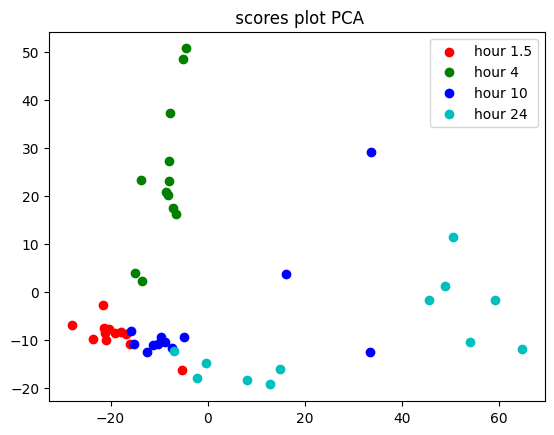

In [35]:
plt.figure()
for c, name in zip("rgbc", ['hour 1.5', 'hour 4' ,'hour 10','hour 24']):
    plt.scatter(X_r[output_time == name, 0], X_r[output_time == name, 1], c=c, label=name)
plt.legend()
plt.title(' scores plot PCA')
plt.show()

Com recurso ao scores plot, pode visualizar-se a distribuição das amostras num espaço de menor dimensão, depois de aplicada a técnica de redução de dimensionalidade PCA. 

### Hierarchical clustering

In [36]:
from sklearn.cluster import AgglomerativeClustering

hclust = AgglomerativeClustering(n_clusters=4, metric="euclidean", linkage="complete") 
hclust.fit(input_dif) 

AgglomerativeClustering(linkage='complete', metric='euclidean', n_clusters=4)

In [37]:
res_hc = hclust.labels_
pd.crosstab (meta["time"], res_hc)

col_0,0,1,2,3
time,,,,
hour 1.5,0,0,12,0
hour 10,1,0,9,2
hour 24,9,0,3,0
hour 4,0,10,2,0


Através da tabela anterior, podem retirar-se informações relativas à associação entre cada um dos clusterings e cada uma das classes do target time. No caso do cluster 0 e do cluster 1 observa-se que os clusters contém maioritariamente clusters de uma classe, nomeadamente da classe 24h e 4h, respetivamente. Quanto ao cluster 2, verifica-se a existência de 12 amostras para um tempo de jejum igual a 1h30. No entanto o cluster 2 apresenta uma distribuição mais diversificada nos diferentes tempos de jejum, mostrando que não se trata de um bom cluster. De salientar que este cluster aglomerou 26 das 48 amostras e consequentemente apenas duas amostras foram agrupadas para o cluster 3. De forma geral, verificou-se que a classe mais prevalente em cada um é diferente. 

In [38]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(input_dif, method='single', metric='euclidean')    
Z[:10]

array([[ 3.        ,  7.        , 38.60863277,  2.        ],
       [ 0.        ,  4.        , 38.6122132 ,  2.        ],
       [ 5.        , 29.        , 40.12952745,  2.        ],
       [18.        , 26.        , 40.30812004,  2.        ],
       [32.        , 33.        , 40.3339223 ,  2.        ],
       [30.        , 51.        , 40.47742582,  3.        ],
       [49.        , 52.        , 40.64163538,  4.        ],
       [ 8.        , 54.        , 41.1493138 ,  5.        ],
       [34.        , 53.        , 41.27659698,  4.        ],
       [13.        , 45.        , 41.40764272,  2.        ]])

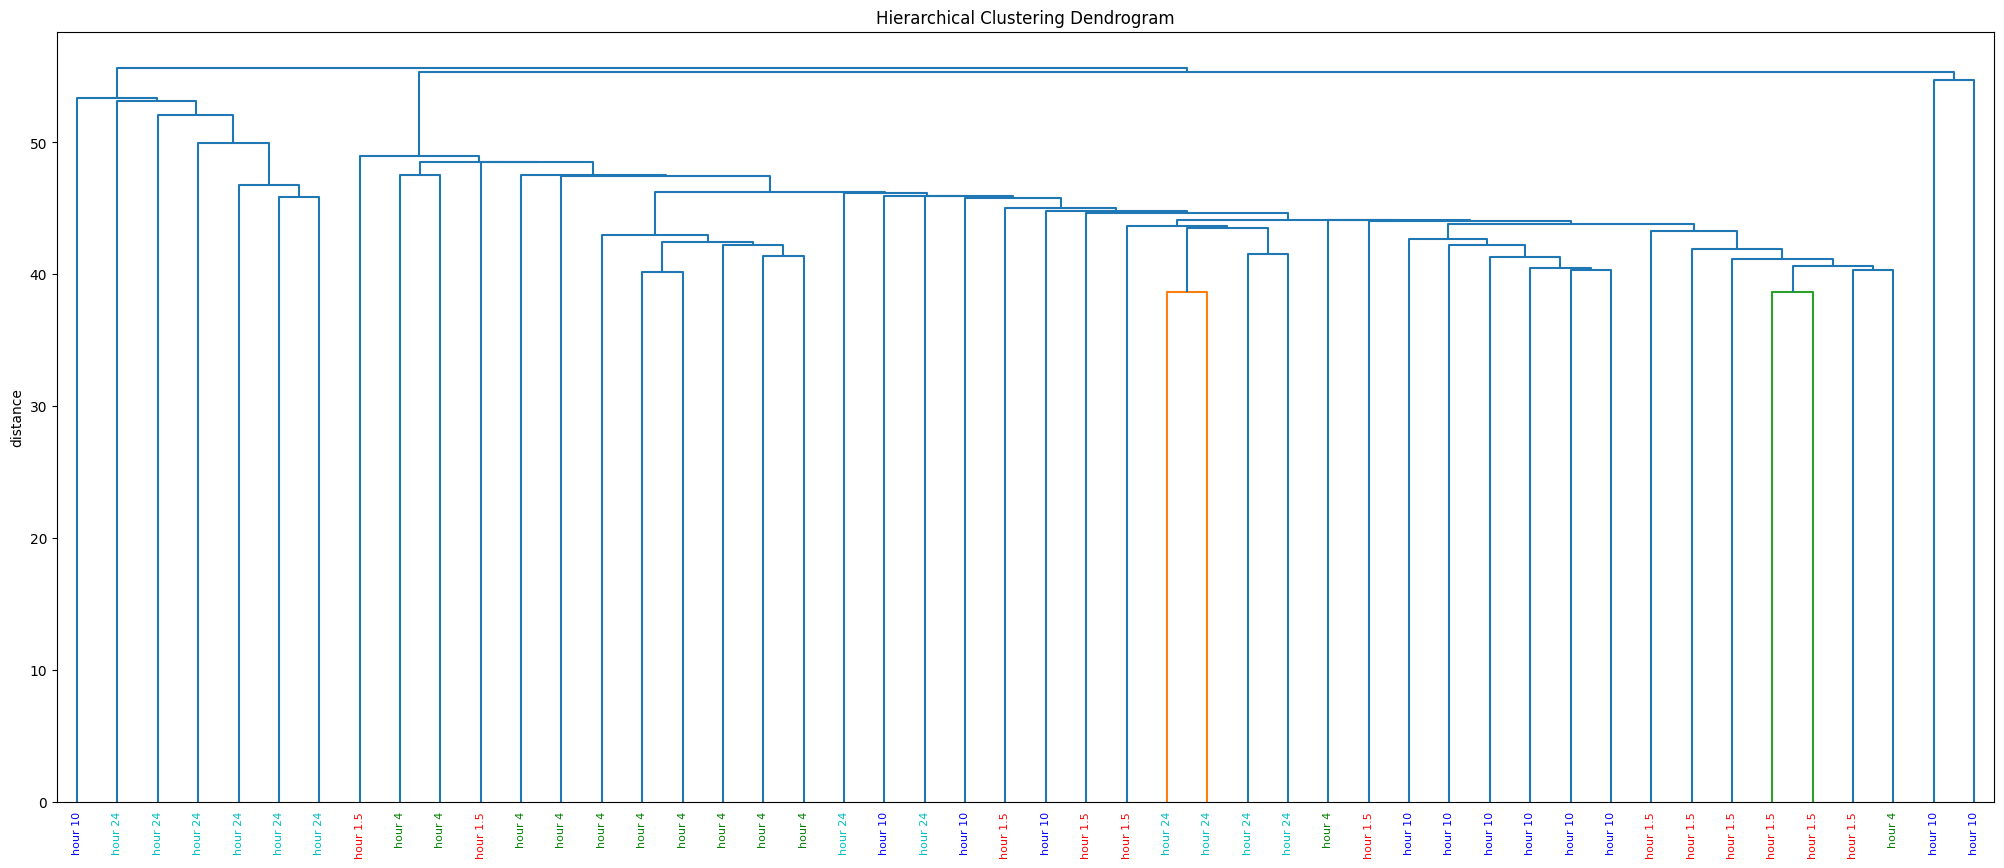

In [39]:

plt.figure(figsize=(25, 10))   # Creates a generic figure
dendrogram(                             # Creates the dendogram
            Z,
            labels=np.array(output_time),    #  select the labels
            leaf_rotation=90.,  # rotates the x-axis labels
            leaf_font_size=8,  # font size for the x-axis labels
)

plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')

# Assignment of colors to labels: 'a' is red, 'b' is green, etc. rgbc 'hour 1.5', 'hour 4' ,'hour 10','hour 24'
label_colors = {'hour 1.5': 'r', 'hour 4': 'g', 'hour 10': 'b', 'hour 24':'c' }
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])
plt.show()

Através do dendograma anterior, é feita a representação da respetiva árvore de agrupamento. Neste dendograma é possível observar com mais definição 4 agrupamentos de dados diferentes, correspondentes às classes do atributo target. No entanto, os resultados não são ótimos, uma vez que se verifica a presença de algumas amostras em locais inesperados.

### K-means clustering

O algoritmo K-means é um método de clustering que divide um conjunto de dados em k clusters distintos.

In [40]:
from sklearn.cluster import KMeans
k=4
kmeans = KMeans(n_clusters=k, max_iter = 1000, n_init = 10)
kmeans.fit(input_dif)
labels = kmeans.labels_
centroids= kmeans.cluster_centers_
pd.crosstab (labels,meta["time"],rownames=['clusters'])

time,hour 1.5,hour 10,hour 24,hour 4
clusters,,,,
0,11,0,0,2
1,0,2,6,0
2,0,0,0,10
3,1,10,6,0


Através da tabela anterior, podem retirar-se informações relativas à associação entre cada um dos clusterings e cada uma das classes do target time. Por exemplo, para o cluster 0, verifica-se a existência de 11 amostras para um tempo de jejum igual a 1h30. De forma semelhante, o cluster 2 e 3 apresentam 10 amostras para um tempo de jejum de 4h e 10h , repetivamente. No caso do cluster 1, o maior número de amostras agrupado foi de 6 para um tempo de 24h após o jejum. Ainda assim, verifica-se que os clusters têm amostras de outros tempos de jejum, o que demonstra que os resultados não são totalmente ótimos.

## Etapa 3

# Supervised Machine Learning

Primeiramente, considerou-se a variável time como target. Para os atributos, incluíu-se apenas os genes que foram identificados como diferencialmente expressos. Geralmente, os conjuntos de dados omics, como o conjunto de genes em análise, frequentemente possuem uma dimensionalidade elevada, o que significa que contêm muitos mais elementos (genes) do que amostras. Desta forma, incluindo todos os genes na análise pode resultar numa pior performance dos algoritmos de aprendizagem de machine learning, devido ao grande número de elementos. Portanto, selecionar-se os genes diferencialmente expressos, ajuda a reduzir a dimensionalidade e pode melhorar o desempenho do modelo. 

In [41]:
input_dif = data_scale[:,genes_dif[0]]

print(input_dif.shape)

(48, 2047)


Para a aplicação de aprendizagem supervisionada é necessário dividir os dados em dados para treino e para teste. Desta forma, foi feita a partição com holdout.

### Split Data - holdout

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
target = meta['time']
train_in, test_in, train_out, test_out = train_test_split(input_dif, target, test_size=1/3, random_state=1)
print(train_in.shape)
print(test_in.shape)

(32, 2047)
(16, 2047)


Posteriormente, foram utilizados 3 modelos : K-Nearest Neighbors (KNN), Decision Trees (DT) e Naive Bayes (NB).

## KNN

O KNN é um algoritmo que classifica uma instância de teste com base na classe ou na média dos valores das k instâncias mais próximas no espaço de características. De realçar, que a escolha do valor de k é crucial para o desempenho do modelo. 

In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(train_in, train_out)
preds = knn.predict(test_in)

print("Predicted Values: ", preds)
print("Real Values: " , test_out)
print("Correct Predition Percentage: ( Accuracy) ", (preds == test_out).sum()/len(preds) )

Predicted Values:  ['hour 4' 'hour 10' 'hour 10' 'hour 1.5' 'hour 10' 'hour 1.5' 'hour 10'
 'hour 10' 'hour 1.5' 'hour 24' 'hour 1.5' 'hour 10' 'hour 4' 'hour 10'
 'hour 24' 'hour 1.5']
Real Values:  GSM1348586      hour 4
GSM1348576     hour 24
GSM1348591     hour 10
GSM1348589    hour 1.5
GSM1348555     hour 10
GSM1348556     hour 24
GSM1348584     hour 24
GSM1348579     hour 10
GSM1348597    hour 1.5
GSM1348580     hour 24
GSM1348581    hour 1.5
GSM1348600     hour 24
GSM1348574      hour 4
GSM1348587     hour 10
GSM1348572     hour 24
GSM1348593    hour 1.5
Name: time, dtype: object
Correct Predition Percentage: ( Accuracy)  0.75


In [45]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score,ConfusionMatrixDisplay

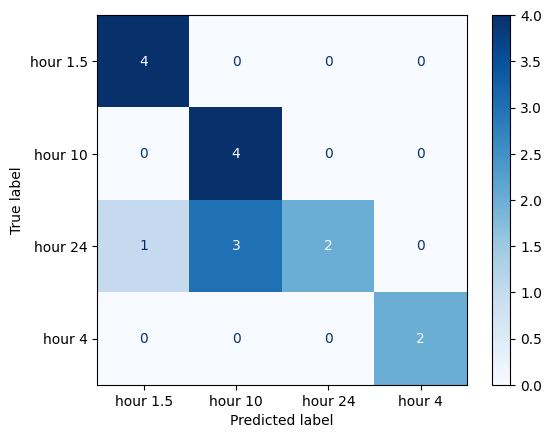

In [46]:
# Matriz de Confusão
knn_cm = ConfusionMatrixDisplay.from_predictions(test_out, preds, display_labels=knn.classes_, cmap='Blues')
knn_cm

Como se pode observar anteriormente, foi feita a matriz de confusão respetivo ao método KNN, onde se pode observar os resultados que foram previstos correta e incorretamente. A partir da matriz, é possível calcular diversas métricas de avaliação, nomeadamente a Accuracy, a Precisão e a Sensibilidade.

-> ***Precisão = TP/(TP+FP)***
-> ***Sensibilidade = TP/(TP+FN)***

In [47]:
# Métricas de Avaliação 
print('Precisão: %0.2f' % precision_score(test_out,preds, average='weighted'))
print('Sensibilidade: %0.2f' % recall_score(test_out,preds, average='weighted'))

Precisão: 0.84
Sensibilidade: 0.75


## Árvores de Decisão (DT)

As árvores de decisão são um modelo de aprendizagem que organizam as suas decisões e as possíveis consequências das mesmas numa estrutura em árvore hierárquica. Cada nó interno da árvore representa um teste ao atributo, os ramos representam os resultados possíveis e as folhas as decisões finais. 

In [48]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(train_in, train_out)
preds_tree = tree_model.predict(test_in)

print("Correct Predition Percentage: ", (preds_tree == test_out).sum()/len(preds_tree) )

Correct Predition Percentage:  0.625


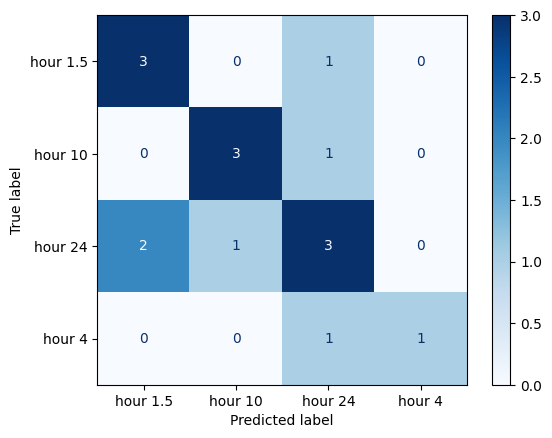

In [49]:
# Matriz de Confusão
tree_cm = ConfusionMatrixDisplay.from_predictions(test_out, preds_tree, display_labels=tree_model.classes_, cmap='Blues')
tree_cm

In [50]:
# Métricas de Avaliação
print('Precisão: %0.2f' % precision_score(test_out,preds_tree, average='weighted'))
print('Sensibilidade: %0.2f' % recall_score(test_out,preds_tree, average='weighted'))


Precisão: 0.65
Sensibilidade: 0.62


## Naive Bayes

O Naive Bayes trata-se de um algoritmo de classificação que recorre ao teorema de Bayes para prever a probabilidade de uma instância pertencer a uma determinada classe, com base nas características observadas. 

In [51]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
gnb_model.fit(train_in, train_out )
preds_gnb = gnb_model.predict(test_in)

print("Correct Predition Percentage: ", (preds_gnb== test_out).sum()/len(preds_gnb) )


Correct Predition Percentage:  0.5625


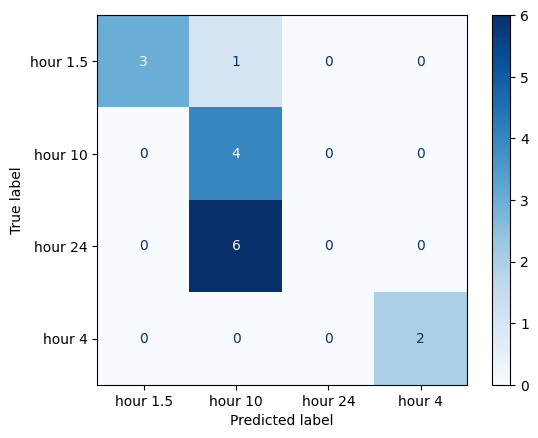

In [52]:
naive_cm = ConfusionMatrixDisplay.from_predictions(test_out, preds_gnb, display_labels=gnb_model.classes_, cmap='Blues')
naive_cm

In [53]:
# Métricas de avaliação
print('Precisão: %0.2f' % precision_score(test_out, preds_gnb, average='weighted'))
print('Sensibilidade: %0.2f' % recall_score(test_out, preds_gnb, average='weighted'))

Precisão: 0.47
Sensibilidade: 0.56


Tendo em conta os resultados obtidos, o modelo que fez uma previsão com melhor desempenho foi o modelo KNN, obtendo-se 75%, 84% e 75% de accuracy, precisão e sensibilidade, respetivamente. Ainda que estes resultados aparentem ser relativamente bons, não é possível assegurar a sua fiabilidade, visto que existem muito poucas amostras no dataset.

Para melhorar a qualidade do modelo , foi testada outra técnica de partição de dados, o cross- validation.

### Cross-Validation

A validação cruzada op conjunto de dados e dividido em k folds. Desta forma, o modelo irá ser treinado k vezes, usando k-1 folds para treino e 1 fold para teste. Assim, cada parte dos dados vai ser utilizada tanto para treino como para teste em diferentes iterações. 

In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
from sklearn.model_selection import StratifiedKFold

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [57]:
# KNN
num_folds = 12
stratified_kfold = StratifiedKFold(n_splits=num_folds)
scores = cross_val_score(estimator=knn, X=input_dif, y=target, cv=stratified_kfold)

Como se verifica, foi utilizado o StratifiedKFold. Esta ferramenta foi a mais adequada, uma vez que o dataset apresenta 4 amostras para cada indíviduo de forma contígua. Assim, foram utilizados para teste as 4 amostras correspondentes a cada indíviduo, selecionando-se os indíces adequados.

In [58]:
print("Modelo Knn com Cross-Validation")
print('Accuracy values:', scores)
print('Mean accuracy: %0.2f' % scores.mean())


Modelo Knn com Cross-Validation
Accuracy values: [0.5 0.5 1.  1.  1.  1.  1.  1.  1.  1.  1.  0.5]
Mean accuracy: 0.88


In [60]:

X=input_dif
y=target


precision_list = []
recall_list = []

for i, (train_idx, test_idx) in enumerate(stratified_kfold.split(X, y)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    print(f"Fold {i + 1}:")
    print("Índices de Treino:", train_idx)
    print("Índices de Teste:", test_idx)
        
    knn.fit(X_train, y_train)

    # Fazer previsões
    y_pred = knn.predict(X_test)

    # Calcular métricas precisão e sensibilidade
    precision = precision_score(y_test, y_pred,average='weighted')
    recall = recall_score(y_test, y_pred,average='weighted')
    
 
    precision_list.append(precision)
    recall_list.append(recall)

mean_precision = sum(precision_list) / len(precision_list)
mean_recall = sum(recall_list) / len(recall_list)

# Imprimir médias
print("Modelo KNN com Cross-Validation")
print('Média de Precisão: %0.2f' %mean_precision)
print("Média de Sensibilidade (Recall):%0.2f" %mean_recall)

Fold 1:
Índices de Treino: [ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Índices de Teste: [0 1 2 3]
Fold 2:
Índices de Treino: [ 0  1  2  3  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Índices de Teste: [4 5 6 7]
Fold 3:
Índices de Treino: [ 0  1  2  3  4  5  6  7 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Índices de Teste: [ 8  9 10 11]
Fold 4:
Índices de Treino: [ 0  1  2  3  4  5  6  7  8  9 10 11 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Índices de Teste: [12 13 14 15]
Fold 5:
Índices de Treino: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Índices de Teste: [16 17 18 19]
Fold 6:
Índices de Treino: [ 0  1  2  

In [61]:
# DECISION TREE

scores_svm_cv = cross_val_score(estimator=tree_model, X=input_dif, y=target, cv=stratified_kfold)

print("Modelo Decision Tree com Cross-Validation")
print('Accuracy values:', scores_svm_cv)
print('Mean accuracy: %0.2f' % scores_svm_cv.mean())


Modelo Decision Tree com Cross-Validation
Accuracy values: [0.5  0.75 0.75 0.5  0.75 0.75 0.75 0.25 0.5  0.75 0.5  0.5 ]
Mean accuracy: 0.60


In [65]:
X=input_dif
y=target


precision_list = []
recall_list = []

for i, (train_idx, test_idx) in enumerate(stratified_kfold.split(X, y)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

   
    tree_model.fit(X_train, y_train)

    # Fazer previsões
    y_pred = tree_model.predict(X_test)

    # Calcular métricas precisão e sensibilidade
    precision = precision_score(y_test, y_pred,average='weighted')
    recall = recall_score(y_test, y_pred,average='weighted')
    
    
    precision_list.append(precision)
    recall_list.append(recall)

mean_precision = sum(precision_list) / len(precision_list)
mean_recall = sum(recall_list) / len(recall_list)

# Imprimir médias
print("Modelo Decision Tree com Cross-Validation")
print("Média de Precisão:%0.2f"%mean_precision)
print("Média de Sensibilidade (Recall):%0.2f" %mean_recall)

Modelo Decision Tree com Cross-Validation
Média de Precisão:0.62
Média de Sensibilidade (Recall):0.73


In [63]:
# NAIVE BAYES

scores_svm_cv = cross_val_score(estimator=gnb_model, X=input_dif, y=target, cv=stratified_kfold)

print("Modelo Naive Bayes com Cross-Validation")
print('Accuracy values:', scores_svm_cv)
print('Mean accuracy: %0.2f' % scores_svm_cv.mean())


Modelo Naive Bayes com Cross-Validation
Accuracy values: [0.5  0.5  1.   1.   1.   1.   0.75 0.75 1.   1.   1.   0.5 ]
Mean accuracy: 0.83


In [64]:

precision_list = []
recall_list = []



for i, (train_idx, test_idx) in enumerate(stratified_kfold.split(X, y)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    gnb_model = GaussianNB()

    # Treinar o modelo
    gnb_model.fit(X_train, y_train)

    # Fazer previsões
    y_pred = gnb_model.predict(X_test)

    # Calcular métricas precisão e sensibilidade
    precision = precision_score(y_test, y_pred,average='weighted')
    recall = recall_score(y_test, y_pred,average='weighted')
    
    precision_list.append(precision)
    recall_list.append(recall)

mean_precision = sum(precision_list) / len(precision_list)
mean_recall = sum(recall_list) / len(recall_list)

# Imprimir médias
print("Modelo Naive Bayes com Cross-Validation")
print("Média de Precisão:%0.2f" %mean_precision)
print("Média de Sensibilidade (Recall):%0.2f" %mean_recall)

Modelo Naive Bayes com Cross-Validation
Média de Precisão:0.79
Média de Sensibilidade (Recall):0.83


Com a técnica de cross-validation obteve-se um melhor desempenho nas métricas de avaliação. Com efeito, a melhor previsão foi feita com o modelo KNN utilizando a técnica de cross-validation para a divisão de treino e teste. Obteve-se 88% de accuracy, no entanto, o resultado está enviesado pela baixo número das amostras (apenas 48), não podendo ser, portanto, considerado um bom modelo de previsão.

 ## Referências científicas




Wijngaarden MA, Bakker LE, van der Zon GC, et al. Regulation of skeletal muscle energy/nutrient-sensing pathways during metabolic adaptation to fasting in healthy humans. Am J Physiol Endocrinol Metab. 2014;307(10):E885-E895. doi:10.1152/ajpendo.00215.2014